## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 72.5 using KNN 

Nitansh Jain  102017025

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [260]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [261]:
# checking if any null values are present
print(spotify_df.isnull().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [262]:
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [263]:
spotify_df.drop_duplicates(subset='title',inplace=True)
spotify_df.drop(spotify_df[spotify_df['title'] == 'Adele'].index, inplace=True)

In [264]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [265]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

spotify_features.drop(['title', 'Unnamed: 0', 'artist'], axis=1, inplace=True)
spotify_features.head()


,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [266]:
# checking correlation table
spotify_features.corr(method='pearson')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
year,1.000000,-0.112485,-0.217328,0.077227,-0.123337,-0.140588,-0.124923,-0.220164,0.097976,0.009207,0.236406
bpm,-0.112485,1.000000,0.137185,-0.136349,0.185522,0.082483,0.022663,-0.032077,-0.123870,0.082028,0.014150
nrgy,-0.217328,0.137185,1.000000,0.174750,0.540525,0.189642,0.416643,-0.137984,-0.554028,0.122138,-0.048663
dnce,0.077227,-0.136349,0.174750,1.000000,0.239543,-0.021800,0.496222,-0.176851,-0.245016,-0.020391,0.116057
dB,-0.123337,0.185522,0.540525,0.239543,1.000000,0.082354,0.289727,-0.106793,-0.188642,0.009696,0.163918
live,-0.140588,0.082483,0.189642,-0.021800,0.082354,1.000000,0.028129,0.098406,-0.104033,0.136586,-0.075583
val,-0.124923,0.022663,0.416643,0.496222,0.289727,0.028129,1.000000,-0.262687,-0.251755,0.125371,0.043903
dur,-0.220164,-0.032077,-0.137984,-0.176851,-0.106793,0.098406,-0.262687,1.000000,0.083184,0.036501,-0.105631
acous,0.097976,-0.123870,-0.554028,-0.245016,-0.188642,-0.104033,-0.251755,0.083184,1.000000,-0.016763,0.019870
spch,0.009207,0.082028,0.122138,-0.020391,0.009696,0.136586,0.125371,0.036501,-0.016763,1.000000,-0.042592


In [267]:
from sklearn import preprocessing
# le_artist = preprocessing.LabelEncoder()
# le_artist.fit(spotify_features['artist'])
# spotify_features['artist'] = le_artist.transform(spotify_features['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_features['genre'])
spotify_features['genre'] = le_genre.transform(spotify_features['genre'])


In [268]:
# splitting spotify_features into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']
print(spotify_features_x.head())

   genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0     46  2010   97    89    67  -4     8   80  217     19     4
1     27  2010   87    93    75  -5    52   64  263     24    23
2     25  2010  120    84    76  -3    29   71  200     10    14
3     25  2010  119    92    70  -4     8   71  295      0     4
4     48  2010  109    84    64  -5     9   43  221      2     4


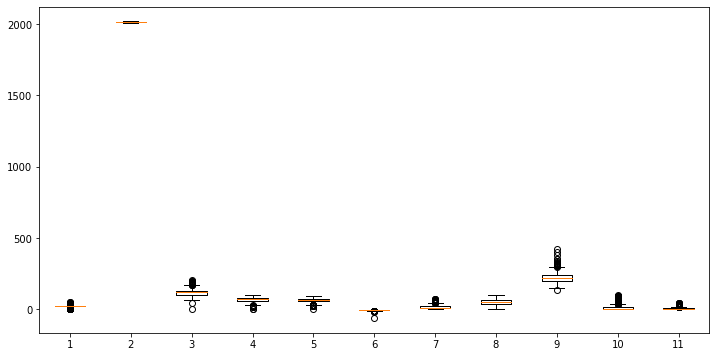

In [269]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_x)
plt.show()

In [270]:
# normalizing spotify_features using min_max scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
spotify_features_scaled_x = spotify_features_x
spotify_features_scaled_x.loc[:,'year':'spch'] = scaler.fit_transform(spotify_features_x.loc[:,'year':'spch'])
spotify_features_scaled_x[0:2]

,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,46,0.0,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333
1,27,0.0,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167


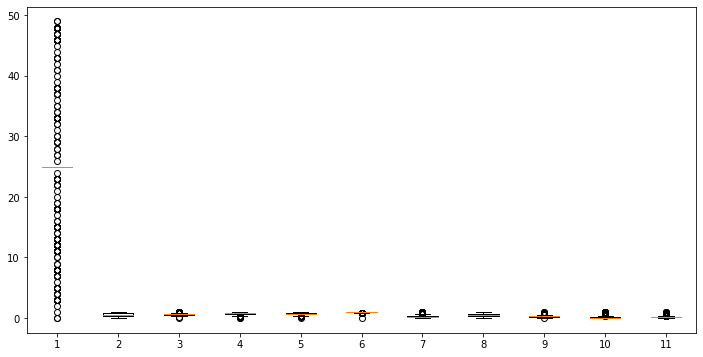

In [271]:
# after normalization of data using min_max scaler
# xticks_values = [0,'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist_type']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_scaled_x)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()


In [272]:
spotify_features_x_np = spotify_features_scaled_x
print(spotify_features_x_np[0:2])

   genre  year       bpm      nrgy      dnce        dB      live       val  \
0     46   0.0  0.470874  0.908163  0.690722  0.965517  0.108108  0.816327   
1     27   0.0  0.422330  0.948980  0.773196  0.948276  0.702703  0.653061   

        dur     acous      spch  
0  0.286207  0.191919  0.083333  
1  0.444828  0.242424  0.479167  


In [273]:
spotify_features_y = np.where(spotify_features_y >= 70, 1, 0)
spotify_features_y[0:5]

array([1, 1, 1, 1, 1])

In [274]:
spotify_features_scaled_y = scaler.fit_transform(spotify_features_y.reshape(-1,1))
spotify_features_scaled_y[0:2]

spotify_features_y_np = spotify_features_y
spotify_features_y_np[0:5]

array([1, 1, 1, 1, 1])

In [275]:
print(spotify_features_x_np[0:2])
print(spotify_features_y_np[0:2])


   genre  year       bpm      nrgy      dnce        dB      live       val  \
0     46   0.0  0.470874  0.908163  0.690722  0.965517  0.108108  0.816327   
1     27   0.0  0.422330  0.948980  0.773196  0.948276  0.702703  0.653061   

        dur     acous      spch  
0  0.286207  0.191919  0.083333  
1  0.444828  0.242424  0.479167  
[1 1]


In [276]:
from sklearn.model_selection import train_test_split
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(spotify_features_x_np, spotify_features_y_np, test_size=0.2, random_state=42)

In [277]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=6).fit(x_train_knn, y_train_knn)
n

KNeighborsClassifier(n_neighbors=6)

In [278]:
yhat_pred_knn = n.predict(x_test_knn)
print(yhat_pred_knn[0:20])
print(y_test_knn[0:20])

[1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
[1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0]


In [279]:
from sklearn import metrics
metrics.accuracy_score(y_test_knn, yhat_pred_knn)

0.6752136752136753

In [280]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_knn,y_train_knn)
    yhat = neigh.predict(x_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn,yhat)
    std_acc[n-1] = np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(np.where(mean_acc == np.max(mean_acc)))

[0.58974359 0.5982906  0.65811966 0.62393162 0.5982906  0.67521368
 0.61538462 0.64102564 0.60683761 0.66666667 0.65811966 0.66666667
 0.64957265 0.65811966 0.64957265 0.64957265 0.63247863 0.64102564
 0.63247863 0.64957265 0.64102564 0.64102564 0.63247863 0.63247863
 0.64957265 0.65811966 0.64957265 0.63247863 0.62393162]
(array([5]),)


In [281]:
cm_knn = confusion_matrix(y_test_knn, yhat_pred_knn)
print(cm_knn)

[[49 13]
 [25 30]]


In [282]:
print('Classification Report: \n', metrics.classification_report(y_test_knn, yhat_pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.79      0.72        62
           1       0.70      0.55      0.61        55

    accuracy                           0.68       117
   macro avg       0.68      0.67      0.67       117
weighted avg       0.68      0.68      0.67       117



In [283]:
error_rate = []
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(x_train_knn,y_train_knn)
    pred_i = Obj.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))


Text(0, 0.5, 'Error Rate')

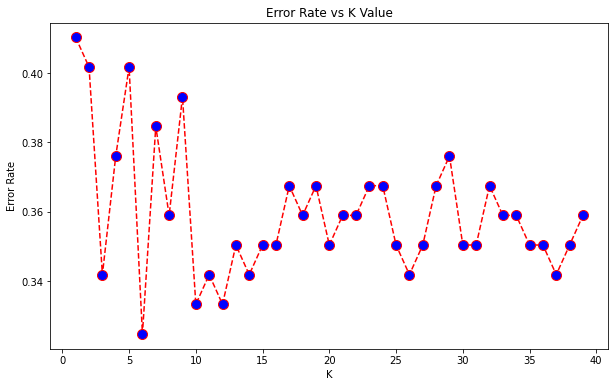

In [284]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [285]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, spotify_features_x_np, spotify_features_y_np, cv=10)
scores

array([0.54237288, 0.57627119, 0.55932203, 0.55932203, 0.5862069 ,
       0.51724138, 0.60344828, 0.51724138, 0.48275862, 0.60344828])

In [286]:
print('%.2f accuracy with a standard deviation of %.2f' % (np.mean(scores), np.std(scores)))

0.55 accuracy with a standard deviation of 0.04


In [287]:
from sklearn.model_selection import cross_val_predict
yhat_pred_knn_cross_val = cross_val_predict(knn, spotify_features_x_np, spotify_features_y_np, cv=10)

In [288]:
metrics.accuracy_score(spotify_features_y, yhat_pred_knn_cross_val)

0.5547945205479452

In [289]:
cm_cross_val_score = confusion_matrix(spotify_features_y, yhat_pred_knn_cross_val)
print(cm_cross_val_score)

[[191 109]
 [151 133]]


In [290]:
print('Classification Report: \n', metrics.classification_report(spotify_features_y, yhat_pred_knn_cross_val))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       300
           1       0.55      0.47      0.51       284

    accuracy                           0.55       584
   macro avg       0.55      0.55      0.55       584
weighted avg       0.55      0.55      0.55       584

